# Polynomial Regression

## Import libraries

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [156]:
from sklearn.preprocessing import PolynomialFeatures

In [157]:
data = np.array([[2, 3, 4]]) 
print(data)

[[2 3 4]]


In [158]:
trans = PolynomialFeatures(degree = 2, include_bias =False)

In [159]:
trans.fit(data) # 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2

PolynomialFeatures(include_bias=False)

In [160]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [161]:
trans.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read Dataset

In [162]:
df = pd.read_csv("https://raw.githubusercontent.com/msddk/DS_Bootcamp/main/Machine%20Learning/Linear%20Regression/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynomial Converter

In [163]:
X = df.drop("sales", axis=1)
y = df.sales

In [164]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [165]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [166]:
poly_features = polynomial_converter.transform(X)

In [167]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [168]:
poly_features.shape

(200, 9)

In [169]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [170]:
X.shape

(200, 3)

## Train | Test Split

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 42)

## Model for fitting

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
model_poly = LinearRegression()

In [175]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [176]:
y_pred = model_poly.predict(X_test)

In [177]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
95,16.9,17.222638,-0.322638
15,22.4,22.764319,-0.364319
30,21.4,20.342403,1.057597
158,7.3,7.638231,-0.338231
128,24.7,24.430702,0.269298
115,12.6,12.626709,-0.026709
69,22.3,22.775810,-0.475810
170,8.4,8.172573,0.227427
174,11.5,12.143459,-0.643459
45,14.9,15.592958,-0.692958


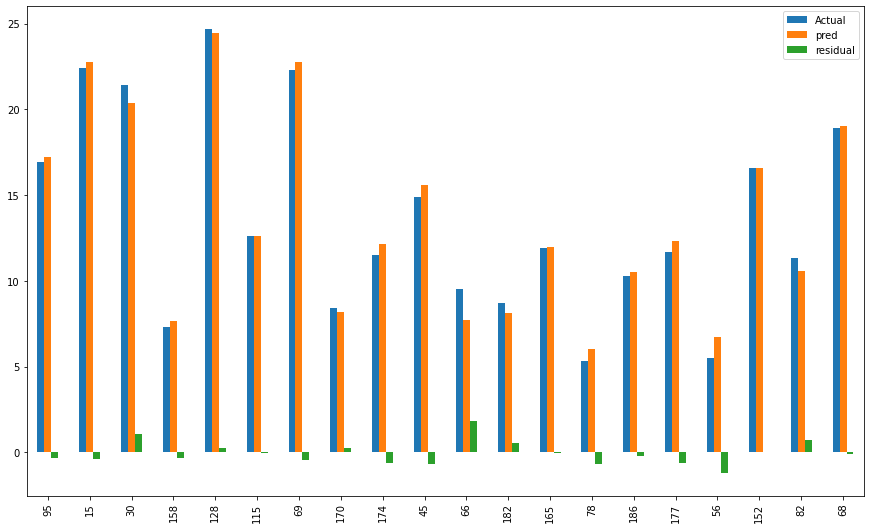

In [178]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

## Poly Coefficients

In [179]:
model_poly.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [180]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [181]:
df_coef

,coef
TV,0.054782
radio,0.013112
newspaper,0.010864
TV^2,-0.000111
TV&Radio,0.001080
TV&Newspaper,-0.000108
Radio^2,0.000302
Radio&newspaper,0.000175
Newspaper^2,0.000101


In [182]:
model_poly.predict([[230.1, 37.8, 69.2, 52946.01, 8697.78, 15922.92, 1428.84, 2615.76, 4788.64]])

array([21.76437986])

## Evaluation on the Test Set

In [183]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [184]:
y_pred = model_poly.predict(X_test)

In [185]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [186]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9808386009966378
MAE 		: 0.5905974833807939
MSE 		: 0.5231944949055299
RMSE 		: 0.723321847385747


In [187]:
y_train_pred = model_poly.predict(X_train)

In [188]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9865054729019952
MAE 		: 0.39112039812603305
MSE 		: 0.3541097754193404
RMSE 		: 0.5950712355838924


* Multiple Linear Regression:

```
    - MAE      : 1.460
    - RMSE     : 1.781
    - r2_score : 0.899
```


* Polynomial 2-degree:
    
```
    - MAE      : 0.590
    - RMSE     : 0.723
    - r2_score : 0.980
```



## Let's find optimal degree of poly

In [189]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))
        

In [190]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,1.574597,1.948537,3
2,0.595071,0.723322,9
3,0.468876,0.539235,19
4,0.369469,1.303227,34
5,0.243822,5.946742,55
6,0.195792,25.387011,83
7,0.524637,617.083048,119
8,0.163401,2042.241082,164
9,0.118851,177882.423702,219


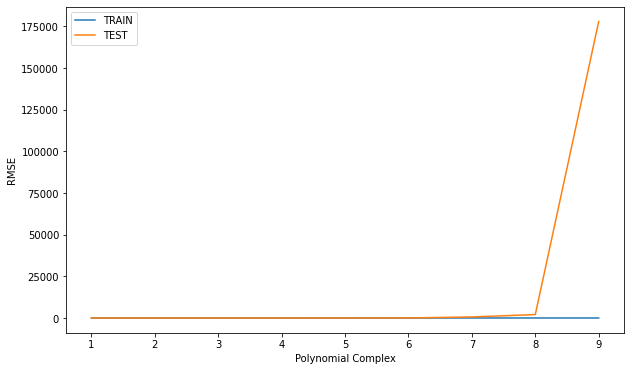

In [191]:
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynomial Complex")
plt.ylabel("RMSE")
plt.legend();

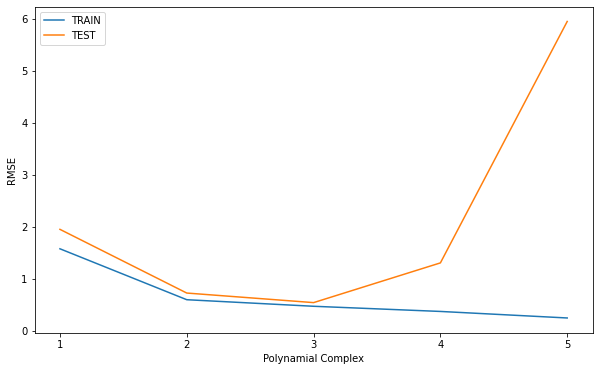

In [192]:
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.xticks(np.arange(1,6,1))
plt.legend();

## Finalizing Model Choice

In [193]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [194]:
final_model = LinearRegression()

In [195]:
final_model.fit(final_poly_converter.fit_transform(X), y)

LinearRegression()

### Predictions

In [212]:
new_record = [[230.1, 37.8, 69.2],
              [44.5, 39.3, 45.1]]

In [213]:
new_record_poly = final_poly_converter.fit_transform(new_record)

In [214]:
new_record_poly

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
        8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
        4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
        3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, 1.98025000e+03,
        1.74885000e+03, 2.00695000e+03, 1.54449000e+03, 1.77243000e+03,
        2.03401000e+03, 8.81211250e+04, 7.78238250e+04, 8.93092750e+04,
        6.87298050e+04, 7.88731350e+04, 9.05134450e+04, 6.06984570e+04,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04]])

In [215]:
final_model.predict(new_record_poly) 

array([21.25112435, 10.76944735])

## Overfitting case

In [216]:
over_poly_converter = PolynomialFeatures(degree =5, include_bias =False)

In [217]:
over_model = LinearRegression()

In [218]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=42)

In [219]:
over_model.fit(X_train, y_train)

LinearRegression()

In [220]:
y_pred_over = over_model.predict(X_test)

In [221]:
eval_metric(y_test, y_pred_over)

Model testing performance:
--------------------------
R2_score 	: -0.29515668376685666
MAE 		: 1.3795283822019895
MSE 		: 35.36374598055288
RMSE 		: 5.946742467986391


In [222]:
y_train_over = over_model.predict(X_train)

In [223]:
eval_metric(y_train, y_train_over)

Model testing performance:
--------------------------
R2_score 	: 0.9977344909818051
MAE 		: 0.18385624027607136
MSE 		: 0.05944920365250044
RMSE 		: 0.24382207375974072
